In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_hub as hub

In [ ]:
sample_sentence = "There's a flood in my street!"

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embed_samples = embed([ok,
                      "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.03548475 -0.02723661 -0.05558902  0.04445504 -0.03599897  0.02758249
 -0.04359206  0.05314511  0.05131629 -0.05802703 -0.06075088  0.04063757
  0.04148686 -0.05908872  0.05372477  0.04250421  0.00354314 -0.01064948
 -0.03274787  0.03149224  0.02185934 -0.05265342  0.04751715 -0.05925574
  0.04055881  0.04414858  0.05825419 -0.00245713 -0.00018735 -0.03666443
  0.06113185  0.04558799 -0.05912823  0.04257477 -0.03110768  0.05427697
 -0.01804283  0.06082459 -0.0234345  -0.03886646 -0.03739525 -0.00448389
 -0.0473186  -0.03546926  0.00800904 -0.05744243  0.0434038   0.03735574
  0.0455386  -0.06086199], shape=(50,), dtype=float32)


In [ ]:
data = pd.read_csv("not_null_train_df.csv")
data.head()

,Unnamed: 0,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
1,3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
2,5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
3,7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
4,9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [ ]:
# Shuffle training dataframe
small_data = data.sample(n = int(len(data)/200),random_state = 0)
small_data.head()

,Unnamed: 0,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
270433,585544,1958163,GT Gloptook Plastic Kitchen Storage Transparen...,[Air Tight PET Containers are made from US FDA...,Canister Set for Safer and Healthier Storage: ...,1252,1200.000000
475528,1029878,2960110,Mdrnbzr:./Steamed Bone Meal - Organic NPK(3-15...,"[Material: Other, Color: Grey.,Package Content...",<p>♥ THANK FOR CHOOSING Mdrnbzr&nbsp;&nbsp;♥</...,10432,393.700787
215970,467894,2423008,You're So Special Akash Printed Coffee Mug Bes...,"[Unique Design, 100% Premium Printing Quality,...",Digital Printing High Quality Design Mug is a ...,1396,393.700787
878111,1901654,2955800,PRINTHUBS Superhero Cartoon Anime Poster for G...,"[Perfect Wall Decor | Attractive Design,Materi...",Superhero Anime Posters Are Printed On a Vinyl...,1557,3.937008
137558,298550,1969073,The Furnishing Tree Microwave Oven Cover for S...,[Waterproof and dustproof with zippered in clo...,With our continuous approach to provide the co...,1510,1900.000000


In [ ]:
len(small_data)

5192

In [ ]:
ok = 'Resin Purse Bag Handle Shoulder Strap Replacement: Convenient to operate. Easy to attach and connect to your bag.,Acrylic Resin Handbag Chain strap:Fashion DIY handle replacement or decoration accessories for purses, handbags and others bags.,Handbag replacement strap: Not easy to rust or fade. Easy to hold the purse with this chain.,Purse Bag Handle Shoulder Strap Cross Body Replacement Chain Strap: Manufactured from material, it is practical, sturdy and durable for long time use.,Resin Bag Strap Acrylic Bag Chain Purse Handle: Make your handbag more fashionable and great for changing the look of it.'

In [ ]:
small_data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
X = small_data.drop(columns = ['PRODUCT_LENGTH'], axis = 1)

In [ ]:
# from sklearn.model_selection import train_test_split as tts
# train_sentences , val_sentences , train_labels , val_labels = tts(data['BULLET_POINTS'].to_numpy(),
#                                                                     data['PRODUCT_LENGTH'].to_numpy(),
#                                                                     test_size = 0.1, # use 10% of training data for validation
#                                                                     random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split as tts
train_sentences , val_sentences , train_labels , val_labels = tts(new_df['KEYWORD_SENTENCE'].to_numpy(),
                                                                    new_df['PRODUCT_LENGTH'].to_numpy(),
                                                                    test_size = 0.1, # use 10% of training data for validation
                                                                    random_state = 42)

In [ ]:
len(train_sentences) , len(val_sentences) , len(train_labels) , len(val_labels) 

(18, 2, 18, 2)

In [ ]:
train_sentences[2]

'Low Smoke Dhoop Cones'

In [ ]:
import tensorflow as tf

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [ ]:
import keras
import keras.layers

In [ ]:
METRICS = [
    keras.metrics.MeanAbsoluteError(name = 'mae'),
    keras.metrics.MeanAbsolutePercentageError(name = 'mape')
]

In [ ]:
# Create model using the Sequential API
model = tf.keras.Sequential([
    sentence_encoder_layer,
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(1),
], name = 'model_USE')

# Compile the model
model.compile(optimizer = keras.optimizers.SGD(), 
              loss = tf.keras.losses.mae,
              metrics = METRICS)

# Fit the model
history = model.fit(x = train_sentences,
            y = train_labels,
            epochs = 1000,
            batch_size = 32,
            validation_data = (val_sentences , val_labels))

Epoch 1/1000
1/1 [==============================] - 1s 883ms/step - loss: 1064.6088 - mae: 1030.2979 - mape: 99.9520 - val_loss: 723.9160 - val_mae: 723.9160 - val_mape: 99.9863
Epoch 2/1000
1/1 [==============================] - 0s 21ms/step - loss: 1064.5916 - mae: 1064.5916 - mape: 99.9797 - val_loss: 723.8995 - val_mae: 723.8995 - val_mape: 99.9840
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 1064.5742 - mae: 1064.5742 - mape: 99.9740 - val_loss: 723.8830 - val_mae: 723.8830 - val_mape: 99.9817
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 1064.5570 - mae: 1064.5570 - mape: 99.9683 - val_loss: 723.8665 - val_mae: 723.8665 - val_mape: 99.9794
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 1064.5396 - mae: 1064.5396 - mape: 99.9626 - val_loss: 723.8494 - val_mae: 723.8494 - val_mape: 99.9771
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 1064.5225 - mae: 1064.5225 - mape: 99.957

<AxesSubplot: xlabel='epochs'>

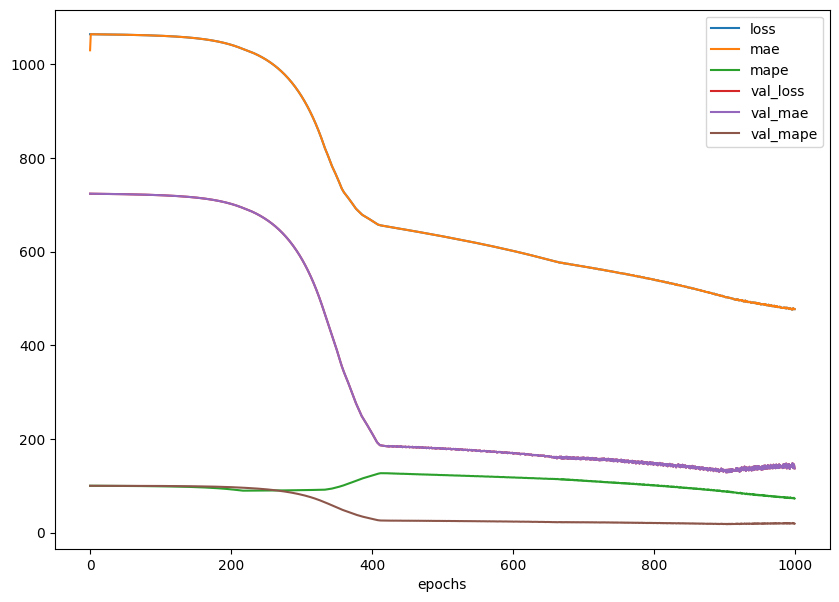

In [ ]:
pd.DataFrame(history.history).plot(figsize =  (10 , 7) , xlabel = "epochs")

In [ ]:
e = np.array(model.history.epoch)+1 # Add one to the list of epochs which is zero-indexed
l = np.array(model.history.history['loss'])
a = np.array(model.history.history['val_loss'])

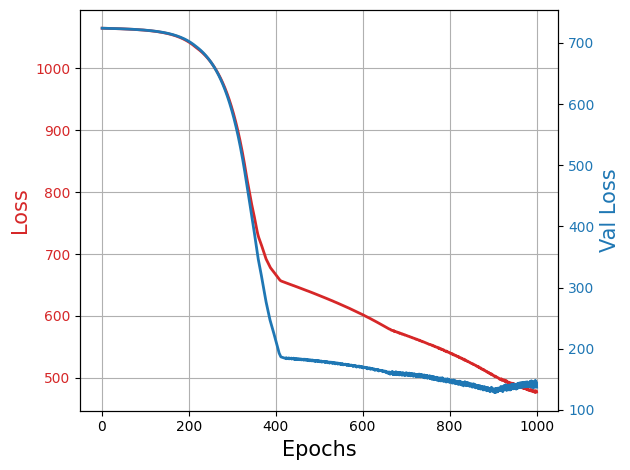

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs',fontsize=15)
ax1.set_ylabel('Loss', color=color,fontsize=15)
ax1.plot(e, l, color=color,lw=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Val Loss', color=color,fontsize=15)  # we already handled the x-label with ax1
ax2.plot(e, a, color=color,lw=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
new_df = pd.read_csv("train_with_keywordSentence1.csv")
new_df.head()

,Unnamed: 0.1,Unnamed: 0,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,processed_description,processed_bullet_points,processed_title,KEYWORD_SENTENCE
0,0,2,2765088,7537,748.031495,Specifications Color Red Material Aluminium Vo...,Loud Dual Tone Trumpet Horn Compatible SXElect...,PRIKNIK Horn Red Electric Air Horn Compressor ...,Dual Tone Air Horn
1,1,3,1594019,2996,787.401574,AISHAH Womens Lycra Cotton Ankel Leggings Bran...,Made cotton Lycra gives ways stretchable comfo...,ALISHAH Womens Cotton Ankle Length Leggings Co...,AISHAH leggings.
2,2,5,2152929,5725,950.000000,HINS Brings Elegant Looking Pot Stand durable ...,Simple elegant great displaying indoor plants ...,HINS Metal Bucket Shape Plant Pot Indoor Outdo...,"HINS pot stands are durable, lovely, and perfe..."
3,3,7,2026580,6030,984.251967,Aluminum Foil Stickersgood kitchen helper mom ...,HIGH QUALITY PVC MATERIAL kitchen aluminum foi...,Delavala Self Adhesive Kitchen Backsplash Wall...,Kitchen backsplash wallpaper.
4,4,9,2998633,8201,393.700787,Transform home workplace hotel room personal a...,Pure Natural Essential Oil Fragrance Oil Bottl...,Hexwell Essential oil Home Fragrance Oil Aroma...,bottle Lavender Rose Tea Tree Rosemary Jasmine...


In [ ]:
new_df.drop(columns = ['Unnamed: 0.1' , 'Unnamed: 0'], axis = 1 , inplace = True)

In [ ]:
new_df.head()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,processed_description,processed_bullet_points,processed_title,KEYWORD_SENTENCE
0,2765088,7537,748.031495,Specifications Color Red Material Aluminium Vo...,Loud Dual Tone Trumpet Horn Compatible SXElect...,PRIKNIK Horn Red Electric Air Horn Compressor ...,Dual Tone Air Horn
1,1594019,2996,787.401574,AISHAH Womens Lycra Cotton Ankel Leggings Bran...,Made cotton Lycra gives ways stretchable comfo...,ALISHAH Womens Cotton Ankle Length Leggings Co...,AISHAH leggings.
2,2152929,5725,950.000000,HINS Brings Elegant Looking Pot Stand durable ...,Simple elegant great displaying indoor plants ...,HINS Metal Bucket Shape Plant Pot Indoor Outdo...,"HINS pot stands are durable, lovely, and perfe..."
3,2026580,6030,984.251967,Aluminum Foil Stickersgood kitchen helper mom ...,HIGH QUALITY PVC MATERIAL kitchen aluminum foi...,Delavala Self Adhesive Kitchen Backsplash Wall...,Kitchen backsplash wallpaper.
4,2998633,8201,393.700787,Transform home workplace hotel room personal a...,Pure Natural Essential Oil Fragrance Oil Bottl...,Hexwell Essential oil Home Fragrance Oil Aroma...,bottle Lavender Rose Tea Tree Rosemary Jasmine...


In [ ]:
y_pred = model.predict(val_sentences)
y_pred

1/1 [==============================] - 0s 269ms/step


array([[633.44226],
       [540.30585]], dtype=float32)

In [ ]:
val_labels

array([748.0314953, 700.       ])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming y_true and y_pred are the true and predicted target values respectively
mape = mean_absolute_percentage_error(y_true, y_pred)


In [ ]:
# lp = ((748.0314953 - 633.44226)/ 748.0314953 + (700.0 - 540.30585) / 700.0)/2
# (1 - lp)*100

80.93388926424005

In [ ]:
# kl = np.mean(keras.metrics.mean_absolute_percentage_error(val_labels, y_pred))
# 1 - (kl/100)

0.811474723815918

In [ ]:
score = max(0 , 0.811474)
score

0.811474

In [ ]:
# score = max(0 , 100*(1-keras.metrics.mean_absolute_percentage_error(val_labels,y_pred)))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()